In [1]:
import os
import numpy as np
import pydicom
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import ipyvolume as ipv
import SimpleITK as sitk

data_path = r"C:\Users\HP\Documents\GitHub\3D-3D_Image_Registration\SE000003"

# List all files in the directory
files = os.listdir(data_path)
print(files)



def load_dicom_series(directory_path):
    reader = sitk.ImageSeriesReader()
    dicom_names = reader.GetGDCMSeriesFileNames(directory_path)
    reader.SetFileNames(dicom_names)
    image = reader.Execute()
    return image

def display_images(image, montage_slices=5):
    # Convert the SimpleITK image to a numpy array
    image_array = sitk.GetArrayFromImage(image)
    
    # Normalize to 0-255
    image_array = ((image_array - image_array.min()) * (1/(image_array.max() - image_array.min()) * 255)).astype('uint8')
    
    # 3D visualization using ipyvolume
    ipv.figure()
    ipv.volshow(image_array, level=[0.25, 0.75], opacity=0.03, level_width=0.1, data_min=0, data_max=255)
    ipv.show()

    # Montage of slices using matplotlib
    fig = plt.figure(figsize=(10, 2))
    slice_interval = image_array.shape[0] // montage_slices
    for i in range(montage_slices):
        ax = fig.add_subplot(1, montage_slices, i + 1)
        ax.imshow(image_array[i * slice_interval], cmap='gray')
        plt.axis('off')
    plt.show()

# Paths to the DICOM directories
fixed_image_path = r"C:\Users\HP\Documents\GitHub\3D-3D_Image_Registration\SE000003"
moving_image_path = r"C:\Users\HP\Documents\GitHub\3D-3D_Image_Registration\SE000003"

# Load the DICOM images
fixed_image = load_dicom_series(fixed_image_path)
moving_image = load_dicom_series(moving_image_path)

# Display the images
display_images(fixed_image)
display_images(moving_image)

# Apply the transformation
registration_method = sitk.ImageRegistrationMethod()
registration_method.SetMetricAsMeanSquares()
registration_method.SetOptimizerAsGradientDescent(learningRate=1.0, numberOfIterations=100, convergenceMinimumValue=1e-6, convergenceWindowSize=10)
registration_method.SetInterpolator(sitk.sitkLinear)

initial_transform = sitk.CenteredTransformInitializer(fixed_image, 
                                                      moving_image, 
                                                      sitk.Euler3DTransform(), 
                                                      sitk.CenteredTransformInitializerFilter.GEOMETRY)

registration_method.SetInitialTransform(initial_transform, inPlace=False)
final_transform_v1 = registration_method.Execute(sitk.Cast(fixed_image, sitk.sitkFloat32), 
                                                 sitk.Cast(moving_image, sitk.sitkFloat32))

# Resample the moving image onto the fixed image's grid
resampler = sitk.ResampleImageFilter()
resampler.SetReferenceImage(fixed_image);
resampler.SetTransform(final_transform_v1);
resampled_moving_image = resampler.Execute(moving_image)

# Display the images
display_images(fixed_image)
display_images(resampled_moving_image)


['CT000000', 'CT000001', 'CT000002', 'CT000003', 'CT000004', 'CT000005', 'CT000006', 'CT000007', 'CT000008', 'CT000009', 'CT000010', 'CT000011', 'CT000012', 'CT000013', 'CT000014', 'CT000015', 'CT000016', 'CT000017', 'CT000018', 'CT000019', 'CT000020', 'CT000021', 'CT000022', 'CT000023', 'CT000024', 'CT000025', 'CT000026', 'CT000027', 'CT000028', 'CT000029', 'CT000030', 'CT000031', 'CT000032', 'CT000033', 'CT000034', 'CT000035', 'CT000036', 'CT000037', 'CT000038', 'CT000039', 'CT000040', 'CT000041', 'CT000042', 'CT000043', 'CT000044', 'CT000045', 'CT000046', 'CT000047', 'CT000048', 'CT000049', 'CT000050', 'CT000051', 'CT000052', 'CT000053', 'CT000054', 'CT000055', 'CT000056', 'CT000057', 'CT000058', 'CT000059', 'CT000060', 'CT000061', 'CT000062', 'CT000063', 'CT000064', 'CT000065', 'CT000066', 'CT000067', 'CT000068', 'CT000069', 'CT000070', 'CT000071', 'CT000072', 'CT000073', 'CT000074', 'CT000075', 'CT000076', 'CT000077', 'CT000078', 'CT000079', 'CT000080', 'CT000081', 'CT000082', 'CT

______________________

Container(children=[VBox(children=(HBox(children=(Label(value='levels:'), FloatSlider(value=0.25, max=1.0, ste…

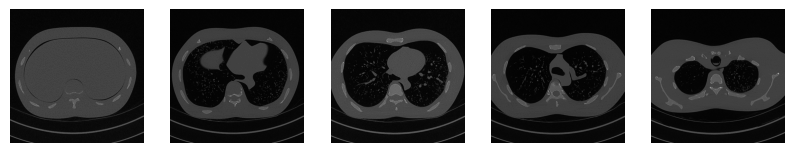

Container(children=[VBox(children=(HBox(children=(Label(value='levels:'), FloatSlider(value=0.25, max=1.0, ste…

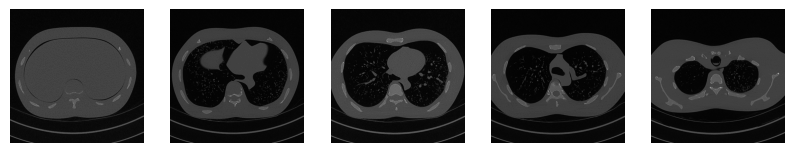

Container(children=[VBox(children=(HBox(children=(Label(value='levels:'), FloatSlider(value=0.25, max=1.0, ste…

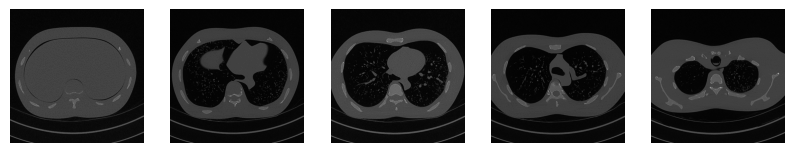

Container(children=[VBox(children=(HBox(children=(Label(value='levels:'), FloatSlider(value=0.25, max=1.0, ste…

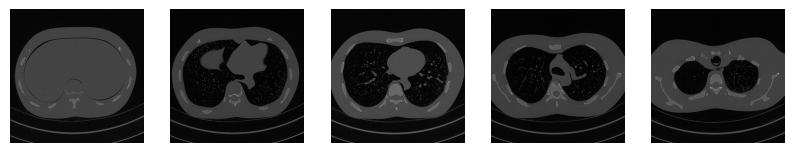